In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd 
pd.options.display.max_columns = 100

import numpy as np 


from PIL import Image
from scipy import ndimage

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)


sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

import cv2
import glob
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Nadam, Adadelta, Adamax
from keras.utils import to_categorical
from matplotlib import pyplot

from keras.layers import Dense, Activation
from keras.regularizers import l1
# instantiate regularizer
reg = l1(0.001)

In [7]:


# load weights into new model
loaded_model = Sequential()
loaded_model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
loaded_model.add(MaxPooling2D(pool_size=2))
loaded_model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
loaded_model.add(MaxPooling2D(pool_size=2))
loaded_model.add(Flatten())
loaded_model.add(Dense(50,activation="relu"))
loaded_model.add(Dense(8,activation="softmax"))#2 represent output layer neurons 

#load from dist
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

loaded_nnmodel = Sequential()
loaded_nnmodel.add(Dense(32, input_shape=(50,50,3)))
loaded_nnmodel.add(Activation('relu'))
loaded_nnmodel.add(Flatten())
loaded_nnmodel.add(Dense(8,activation="softmax")) 

#load from dist
loaded_nnmodel.load_weights("nnmodel.h5")
print("Loaded model from disk")



Loaded model from disk
Loaded model from disk


In [8]:
classes = ["dyed-lifted-polyps","dyed-resection-margins","esophagitis","normal-cecum","normal-pylorus","normal-z-line","polyps","ulcerative-colitis"]

def printPredictedValues(images_name,pred):
    for i in range(len(images_name)):
        predicted_class = ""
        for j in range(len(pred[i])):
            if(pred[i][j] > 0.5) :
                predicted_class += " "+classes[j]
        
        print(images_name[i] + " belongs to :" + predicted_class);


In [ ]:
images_for_test = []
images_names = []
data_path = "C:\\Users\\kratika\\KratikaML\\QX_DataScience_Kratika\\20-projects_List\\endoscopy\\test-data";
for i in glob.glob(os.path.join(data_path,'*')):
    img = cv2.imread(i)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images_for_test.append(np.array(img))
    
    images_names.append(i.replace(os.path.join(data_path,''), ""))
images_for_test = np.array(images_for_test)

In [ ]:
predicted_values_nnmodel = loaded_nnmodel.predict(images_for_test)


print("NN Model Predicted Values : ")
printPredictedValues(images_names, predicted_values_nnmodel)

In [55]:
predicted_values_model = loaded_model.predict(images_for_test)
print("cnnmodel_rmsprop Model Predicted Values : ")
printPredictedValues(images_names, predicted_values_model)

cnnmodel_rmsprop Model Predicted Values : 
0a61aa6a-b6f8-426b-acb4-2818dd6aebd6.jpg belongs to : normal-cecum
0a705c2b-b8eb-4b13-bc0c-63bb4a2fd166.jpg belongs to : normal-cecum
0a779eab-7b2e-4807-a8b2-cd685c55611a.jpg belongs to : ulcerative-colitis
0ab26ff5-3161-4a17-bcf4-95663033af0a.jpg belongs to : polyps
0b13d7f1-9ed0-4904-b524-14f25637f669.jpg belongs to : normal-cecum
0b987b88-9c1b-41f6-b54e-9536480312a5.jpg belongs to : normal-cecum
0c192d17-18ae-4731-bbb5-1117b8576466.jpg belongs to : normal-cecum
0c259b0e-d3c8-4c3b-b288-2470de32c798.jpg belongs to : polyps
0c35f6e7-253c-4f2d-a7ce-b9ad244289ce.jpg belongs to : normal-cecum
0c89b42f-aefc-411c-8805-5aeb4345df42.jpg belongs to : normal-cecum
0c8c6bb6-3b70-4a88-80d8-6c46fc129c30.jpg belongs to : normal-cecum
0c9420a5-7276-4269-81ec-36352b34ee41.jpg belongs to : normal-cecum
0c9ae570-1bb9-44ee-96db-11deabcc791e.jpg belongs to : normal-cecum
0caa503d-9303-4979-a649-3d4cfc1ef2c1.jpg belongs to : normal-cecum
0cb87b92-a78f-4bba-9543-9

In [56]:
# Testing

from keras.preprocessing.image import ImageDataGenerator
data_path = "C:\\Users\\kratika\\KratikaML\\QX_DataScience_Kratika\\20-projects_List\\endoscopy\\TEST-DATA-3-INTERNET";

test_data_generator = ImageDataGenerator(rescale=1./255)

test_generator = test_data_generator.flow_from_directory(
    data_path, 
    target_size=(50, 50),
    batch_size=1,
    shuffle=False)

test_generator.__len__()

Found 16 images belonging to 8 classes.


16

69.55% dyed-resection-margins file:normal-cecum\0a61aa6a-b6f8-426b-acb4-2818dd6aebd6.jpg


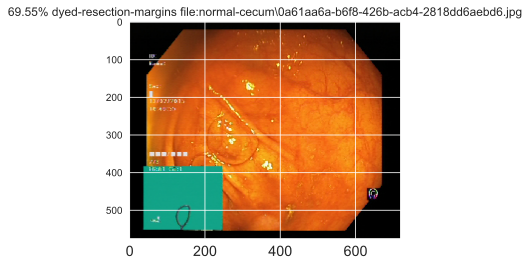

78.31% dyed-resection-margins file:normal-cecum\0a705c2b-b8eb-4b13-bc0c-63bb4a2fd166.jpg


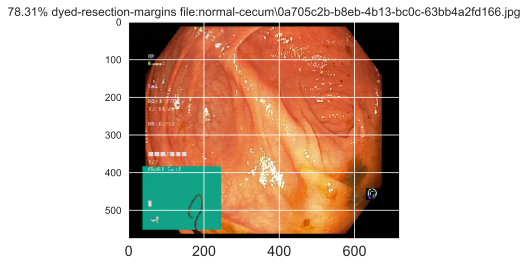

54.98% dyed-resection-margins file:normal-cecum\0a779eab-7b2e-4807-a8b2-cd685c55611a.jpg


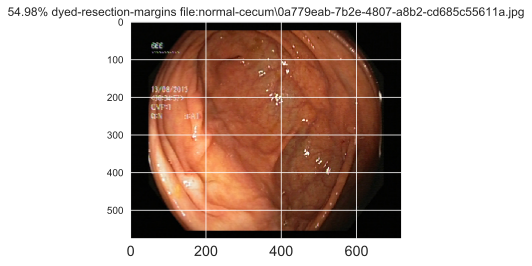

59.39% dyed-resection-margins file:normal-cecum\0ab26ff5-3161-4a17-bcf4-95663033af0a.jpg


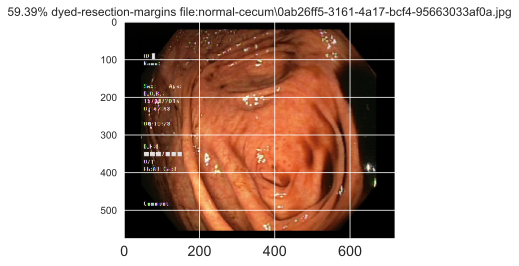

75.58% dyed-resection-margins file:normal-cecum\0b13d7f1-9ed0-4904-b524-14f25637f669.jpg


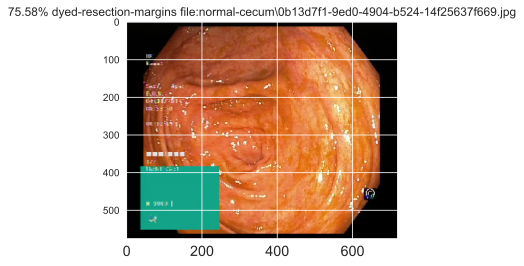

68.26% dyed-resection-margins file:normal-cecum\0b987b88-9c1b-41f6-b54e-9536480312a5.jpg


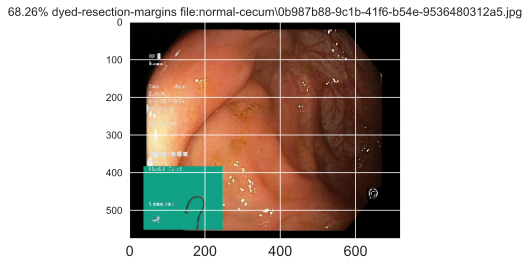

60.82% dyed-resection-margins file:normal-cecum\0c192d17-18ae-4731-bbb5-1117b8576466.jpg


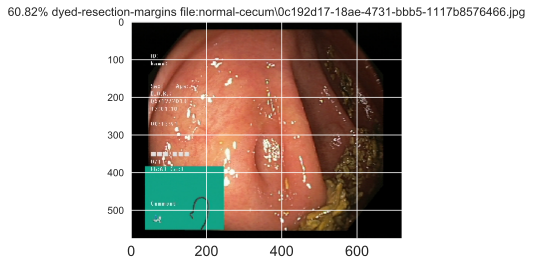

56.31% dyed-resection-margins file:normal-cecum\0c259b0e-d3c8-4c3b-b288-2470de32c798.jpg


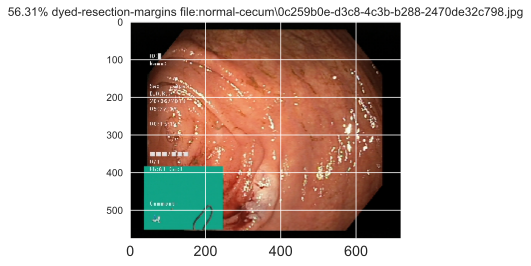

65.68% dyed-resection-margins file:normal-cecum\0c35f6e7-253c-4f2d-a7ce-b9ad244289ce.jpg


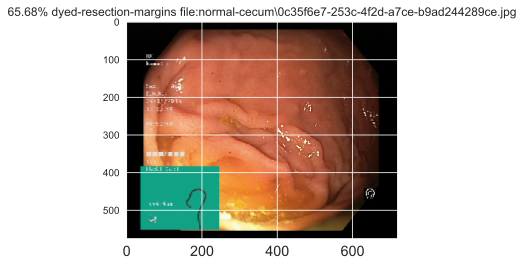

80.71% dyed-resection-margins file:normal-cecum\0c89b42f-aefc-411c-8805-5aeb4345df42.jpg


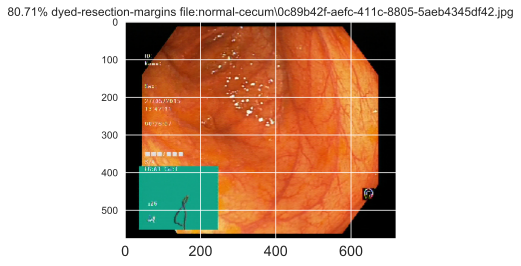

70.95% dyed-resection-margins file:normal-cecum\0c8c6bb6-3b70-4a88-80d8-6c46fc129c30.jpg


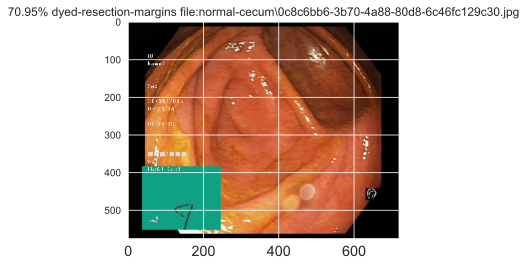

71.76% dyed-resection-margins file:normal-cecum\0c9420a5-7276-4269-81ec-36352b34ee41.jpg


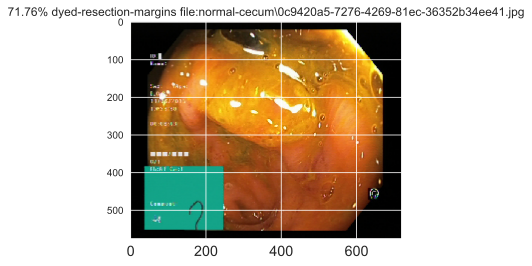

79.45% dyed-resection-margins file:normal-cecum\0c9ae570-1bb9-44ee-96db-11deabcc791e.jpg


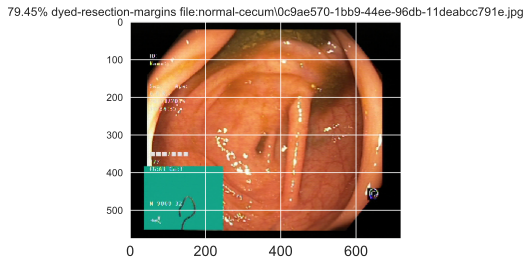

66.54% dyed-resection-margins file:normal-cecum\0caa503d-9303-4979-a649-3d4cfc1ef2c1.jpg


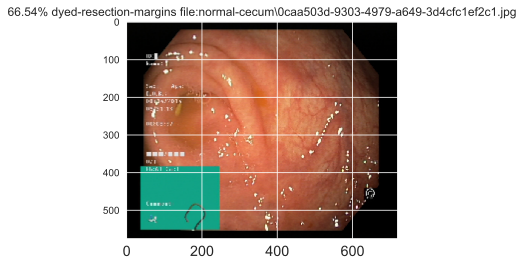

64.93% dyed-resection-margins file:normal-cecum\0cb87b92-a78f-4bba-9543-9540048a73f1.jpg


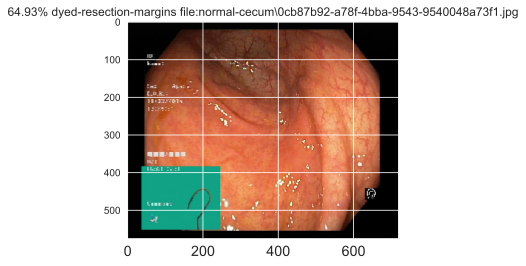

56.95% dyed-resection-margins file:normal-cecum\0cf8e803-870d-40a1-8e8a-8c4ded51561e.jpg


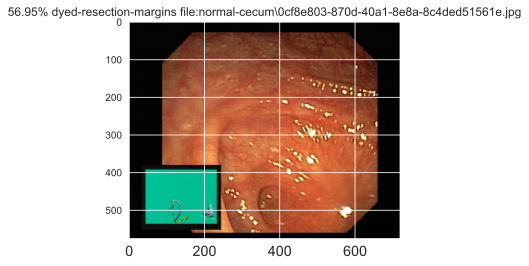

IndexError: list index out of range

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
probabilities = loaded_model.predict_generator(test_generator,steps=300)

for index, probability in enumerate(probabilities):
    image_path = data_path + "\\" +test_generator.filenames[index]
    
    
    for i, val in enumerate( probability):
        if(val > 0.5):
            print("%.2f" % (probability[i]*100) + "% " + classes[i] + " file:"+test_generator.filenames[index])
            plt.title("%.2f" % (probability[i]*100) + "% " + classes[i] + " file:"+test_generator.filenames[index])


In [ ]:
from sklearn.calibration import calibration_curve

data_path = "C:\\Users\\kratika\\KratikaML\\QX_DataScience_Kratika\\20-projects_List\\endoscopy\\test-data";
probs = loaded_model.predict_proba(testX)
calibration_curve()